In [1]:
## Add parent directory to system path so we can add modules from there
# https://stackoverflow.com/questions/714063/importing-modules-from-parent-folder#11158224
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
## Auto reload changed modules
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time

from evaluation import reading, evaluation

In [4]:
def is_negative(head, tail, cluster, all_pairs):
    if (head, tail) in all_pairs:
        return False
    else:
        return cluster[head] != cluster[tail]

In [5]:
fb15k_data = reading.read_dataset('fb15k')
wn_data = reading.read_dataset('wn')

In [6]:
fb15k = evaluation.Evaluation(*fb15k_data, is_negative=is_negative)
wn = evaluation.Evaluation(*wn_data, is_negative=is_negative)

In [7]:
fb15k.hits_n(10), wn.hits_n(10)

(0.5233447884748862, 0.8079)

In [8]:
thresholds = np.arange(0, 0.1, 0.01)
precision_fb = []
precision_wn = []
for t in thresholds:
    precision_fb.append(fb15k.hits_threshold(t))
    precision_wn.append(wn.hits_threshold(t))

(array([0., 1.]), array([ 15577, 102565]))
(array([0., 1.]), array([ 467, 9533]))
(array([0., 1.]), array([47188, 70954]))
(array([0., 1.]), array([1536, 8464]))
(array([0., 1.]), array([57230, 60912]))
(array([0., 1.]), array([2006, 7994]))
(array([0., 1.]), array([63882, 54260]))
(array([0., 1.]), array([2418, 7582]))
(array([0., 1.]), array([68623, 49519]))
(array([0., 1.]), array([2716, 7284]))
(array([0., 1.]), array([72456, 45686]))
(array([0., 1.]), array([2976, 7024]))
(array([0., 1.]), array([75565, 42577]))
(array([0., 1.]), array([3226, 6774]))
(array([0., 1.]), array([78065, 40077]))
(array([0., 1.]), array([3481, 6519]))
(array([0., 1.]), array([80172, 37970]))
(array([0., 1.]), array([3680, 6320]))
(array([0., 1.]), array([82054, 36088]))
(array([0., 1.]), array([3887, 6113]))


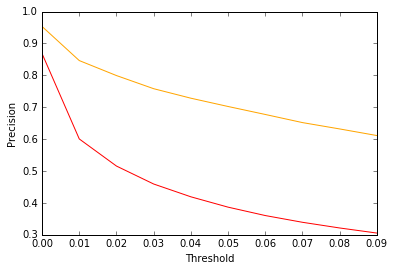

In [9]:
plt.plot(thresholds, precision_fb, color='red')
plt.plot(thresholds, precision_wn, color='orange')
plt.xlabel("Threshold")
plt.ylabel("Precision")

In [10]:
precisions_fb = []
precisions_wn = []
counts = []
times = []

for t in thresholds:
    begin = time.clock()
    precision, count = fb15k.hits_neg_threshold(t)
    end = time.clock()
    precisions_fb.append(precision)
    counts.append(count)
    times.append(end - begin)

KeyboardInterrupt: 

In [ ]:
np.mean(times)

In [ ]:
dims = 10
plt.plot(thresholds[:dims], precisions_fb[:dims], color='red')
plt.xlabel("Threshold")
plt.ylabel("Precision")

In [ ]:
start = 1
plt.plot(thresholds[start:dims], np.min(counts, axis=1)[start:dims], color='yellow', label="Minimum")
plt.plot(thresholds[start:dims], np.median(counts, axis=1)[start:dims], color='orange', label="Median")
plt.plot(thresholds[start:dims], np.mean(counts, axis=1)[start:dims], color='green', label="Mean")
plt.plot(thresholds[start:dims], np.max(counts, axis=1)[start:dims], color='red', label="Maximum")
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Number of Predictions")

In [ ]:
precisions_fb = []
counts = []
times = []

for t in thresholds:
    begin = time.clock()
    precision, count = fb15k.hits_group(t)
    end = time.clock()
    precisions_fb.append(precision)
    counts.append(count)
    times.append(end - begin)

In [ ]:
np.mean(times)

In [ ]:
np.max(precisions_fb)

In [ ]:
plt.plot(thresholds, precisions_fb, color='red')
plt.xlabel("Threshold")
plt.ylabel("Precision")

In [ ]:
precision, counts = fb15k.hits_group(0.011, False)

In [ ]:
plt.plot(counts)

In [ ]:
## Becnhmark with approx. maximum
iterations = 10
threshold = 0.0011

times_group = []
times_neg = []

for i in range(iterations):
    start = time.clock()
    fb15k.hits_group(threshold)
    end = time.clock()
    times_group.append(end - start)
    
    start = time.clock()
    fb15k.hits_neg_threshold(threshold)
    end = time.clock()
    times_neg.append(end - start)

print("Grouped:", np.mean(times_group), "Only Negatives:", np.mean(times_neg))

In [ ]:
plt.plot(times_group, color='green')
plt.plot(times_neg, color='orange')
plt.show()

In [ ]:
# TODO:
# Select negative samples from graph.
# Approaches:
# 1. Cluster the graph and select nodes pairs from to very different clusters – these should not appear in the data
# 2. Find nodes that never have an edge of some type

In [ ]:
# Average probability among top 10
top_n = 10
top_prob = fb15k_data[1][:, :top_n]
np.median(top_prob), np.mean(top_prob), np.max(top_prob), np.min(top_prob)

In [ ]:
fb15k_data[1].shape[1]

In [ ]:
dims = 15
plt.plot(np.arange(dims), np.median(fb15k_data[1], axis=0)[:dims], color='blue')
plt.plot(np.arange(dims), np.mean(fb15k_data[1], axis=0)[:dims], color='orange')
plt.plot(np.arange(dims), np.max(fb15k_data[1], axis=0)[:dims], color='red')
plt.plot(np.arange(dims), np.min(fb15k_data[1], axis=0)[:dims], color='green')
plt.show()

In [ ]:
x = np.arange(len(top_prob))
plt.plot(x, np.median(top_prob, axis=1), color='blue')
#plt.plot(x, np.mean(top_prob, axis=1), color='orange')
#plt.plot(x, np.max(top_prob, axis=1), color='red')
#plt.plot(x, np.min(top_prob, axis=1), color='green')
plt.show()